<a href="https://colab.research.google.com/github/nisha1365/TECHNICAL_TRAINING_CTS/blob/main/Nisha_2211566_TelecomChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np # Multi- dimensional array object
import pandas as pd # Data Manipulation
import matplotlib.pyplot as plt # Data Vizualization
import seaborn as sns # Data Vizualization
%matplotlib inline
import plotly.express as px # Interactive Data Vizualization

In [3]:
# Read the CSV file
telecom_df = pd.read_csv('/content/telecom_churn.csv')
telecom_df

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,415,2845,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,2301,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1616,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,2510,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,155,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,11,50,408,2000,0,1,40,235.7,127,40.07,...,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0
4996,49,152,415,394,0,0,0,184.2,90,31.31,...,73,21.83,213.6,113,9.61,14.7,2,3.97,3,1
4997,7,61,415,313,0,0,0,140.6,89,23.90,...,128,14.69,212.4,97,9.56,13.6,4,3.67,1,0
4998,7,109,510,3471,0,0,0,188.8,67,32.10,...,92,14.59,224.4,89,10.10,8.5,6,2.30,0,0


In [4]:
# Load the top 5 instances
telecom_df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,415,2845,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,2301,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1616,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,2510,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,155,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [5]:
# Load the bottom 5 instances
telecom_df.tail()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
4995,11,50,408,2000,0,1,40,235.7,127,40.07,...,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0
4996,49,152,415,394,0,0,0,184.2,90,31.31,...,73,21.83,213.6,113,9.61,14.7,2,3.97,3,1
4997,7,61,415,313,0,0,0,140.6,89,23.90,...,128,14.69,212.4,97,9.56,13.6,4,3.67,1,0
4998,7,109,510,3471,0,0,0,188.8,67,32.10,...,92,14.59,224.4,89,10.10,8.5,6,2.30,0,0
4999,46,86,415,2412,0,1,34,129.4,102,22.00,...,104,22.70,154.8,100,6.97,9.3,16,2.51,0,0


In [6]:
# Check the shape of the Data Frame
telecom_df.shape

(5000, 21)

In [7]:
# Display the feature columns
telecom_df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'class'],
      dtype='object')

In [8]:
# Obtain the summary of the data types
telecom_df.dtypes

state                              int64
account_length                     int64
area_code                          int64
phone_number                       int64
international_plan                 int64
voice_mail_plan                    int64
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
class                              int64
dtype: object

## Data Vizualization

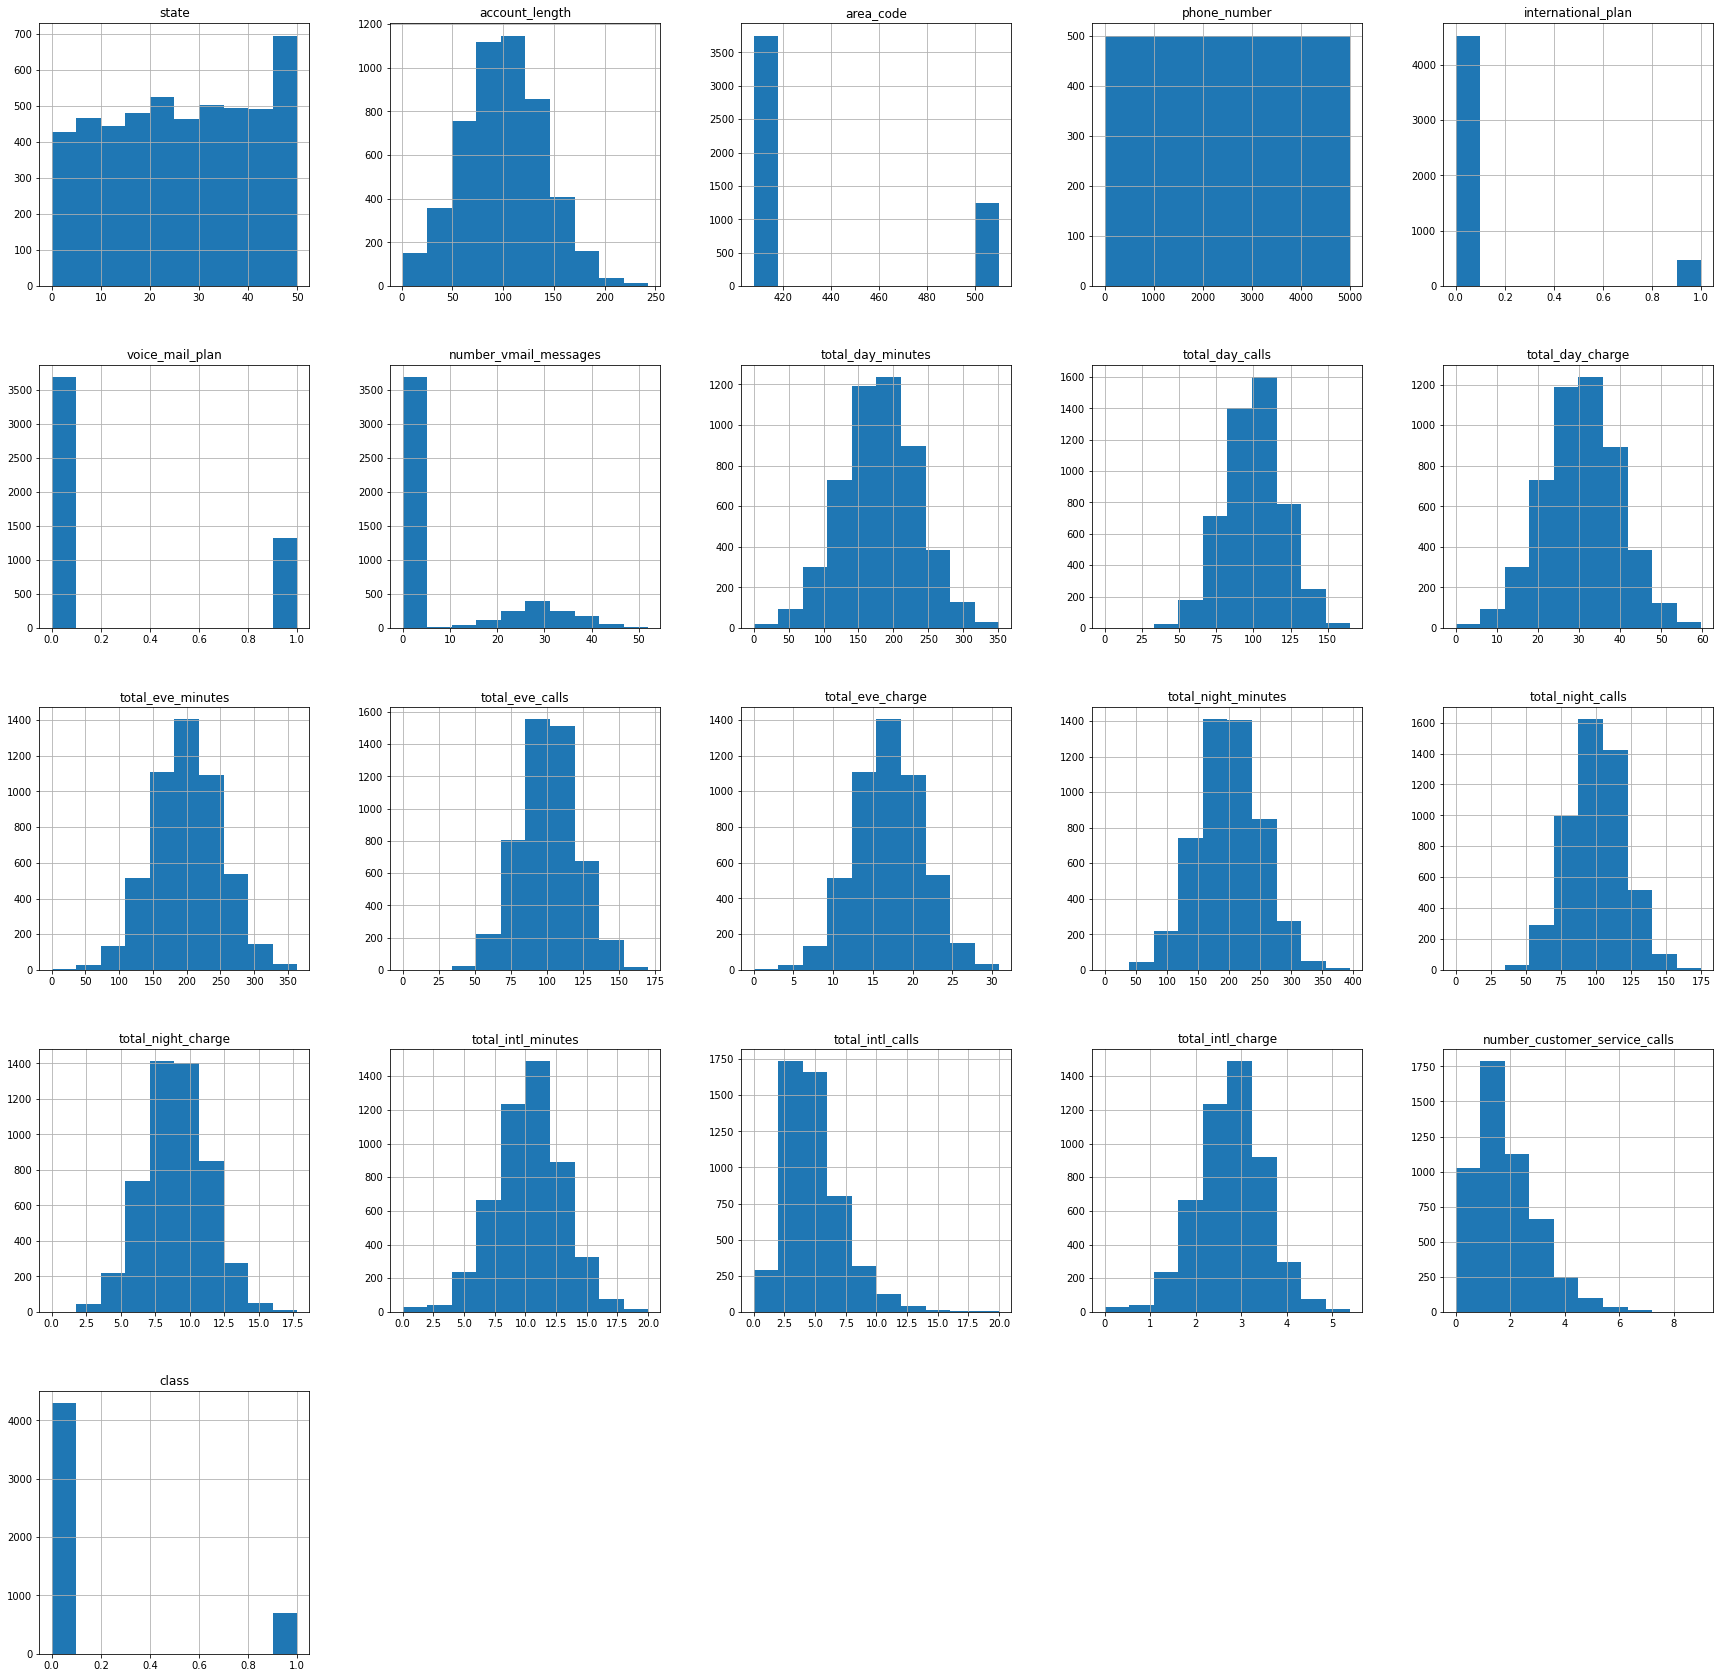

In [9]:
telecom_df.hist(figsize = (30,30))
plt.show()

In [10]:
telecom_df["class"].value_counts()

0    4293
1     707
Name: class, dtype: int64

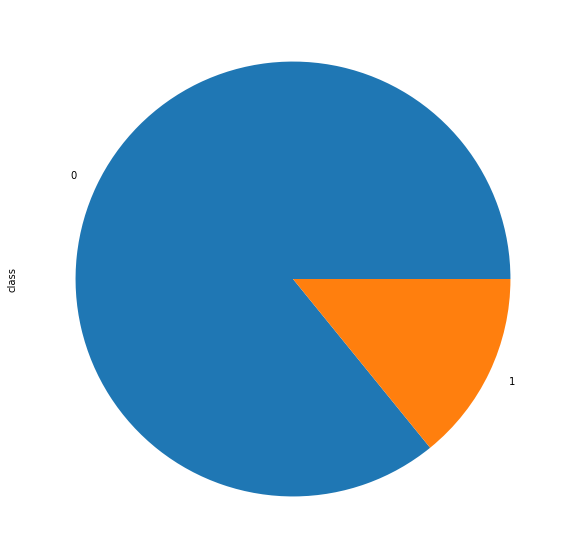

In [11]:
plt.figure(figsize = [10,10])
telecom_df["class"].value_counts().plot(kind = 'pie')

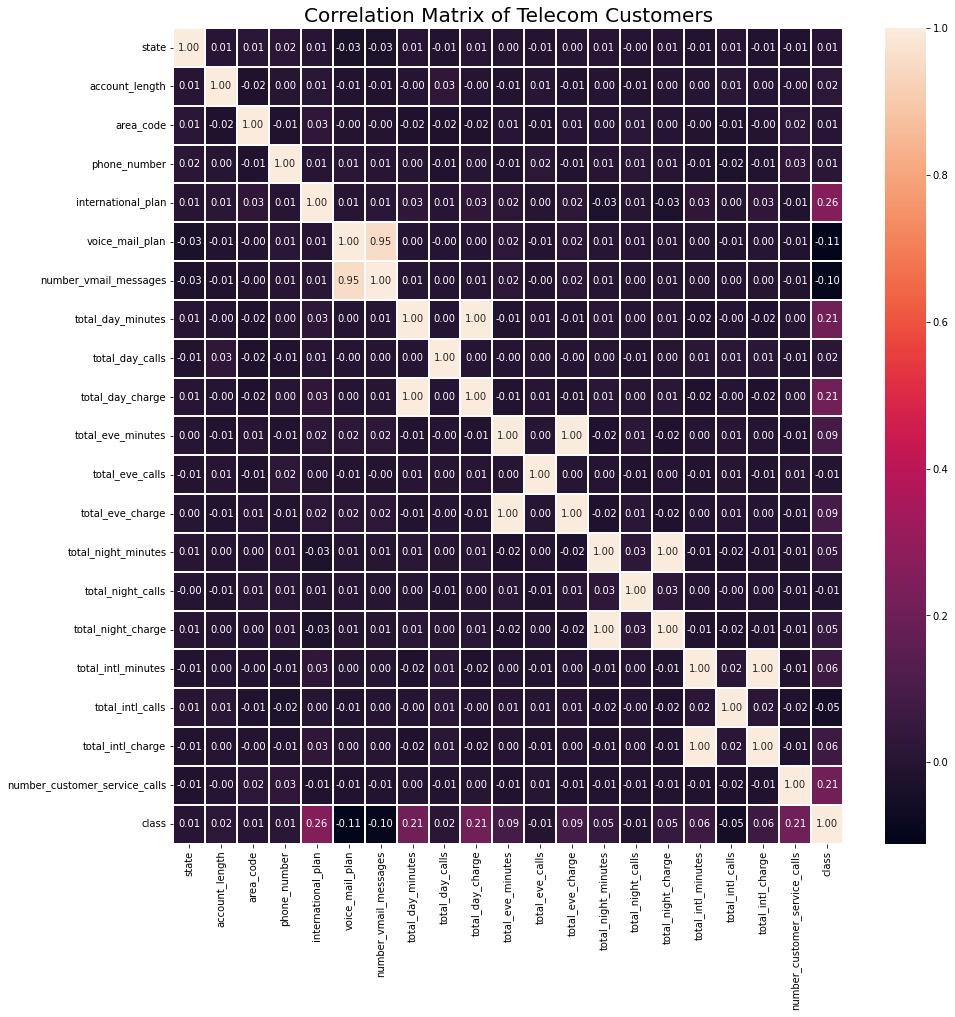

In [12]:
# Correlation Matrix

corr_matrix = telecom_df.corr()
plt.figure(figsize = (15, 15))
cm = sns.heatmap(corr_matrix,
               linewidths = 1,
               annot = True,
               fmt = ".2f")
plt.title("Correlation Matrix of Telecom Customers", fontsize = 20)
plt.show()

Text(0.5, 1.0, 'Distribution of day charges by churn')

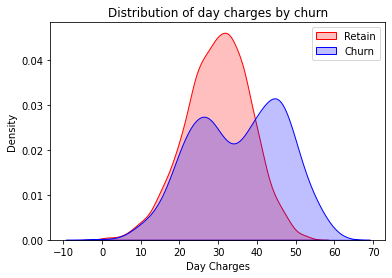

In [13]:
# Churn by day charges
ax = sns.kdeplot(telecom_df.total_day_charge[(telecom_df["class"] == 0)],
               color = "Red", shade = True)
ax = sns.kdeplot(telecom_df.total_day_charge[(telecom_df["class"] == 1)],
               color = "Blue", shade = True)
 
ax.legend(["Retain", "Churn"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Day Charges")
ax.set_title("Distribution of day charges by churn")



Identify feature importance and prepare thr data before model training

In [14]:
# Assigning input features to X and output (churn) to y
# generalization performance
X = telecom_df.drop(["class","area_code","phone_number"], axis ="columns")
y = telecom_df["class"]

In [15]:
X.shape

(5000, 18)

In [16]:
y.shape

(5000,)

In [17]:
# Perfrom train - test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=150)

In [18]:
X_train.shape

(3750, 18)

In [19]:
X_test.shape

(1250, 18)

## BUILD A RANDOM FOREST CLASSIIFIER

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

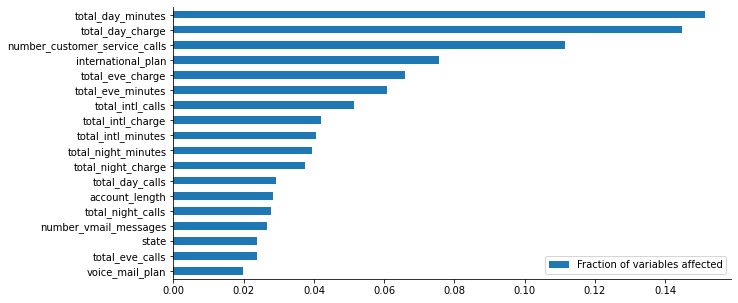

In [21]:
# Plot the feature importance

feat_scores= pd.DataFrame({"Fraction of variables affected" : rf.feature_importances_},index = X.columns)
feat_scores= feat_scores.sort_values(by = "Fraction of variables affected")
feat_scores.plot(kind = "barh", figsize = (10, 5))
sns.despine()



In [22]:
# The above grapgh is generated by Random Forest

## BUILD A LOGISTIC REGRSSION MODEL

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix

model_LR = LogisticRegression(max_iter = 10000)

model_LR.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [24]:
y_predict = model_LR.predict(X_test)

In [25]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1085
           1       0.47      0.21      0.29       165

    accuracy                           0.86      1250
   macro avg       0.68      0.59      0.61      1250
weighted avg       0.83      0.86      0.84      1250



## BUILD A SVM CLASSIFIER

In [26]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC

model_svc = LinearSVC(max_iter = 10000)
model_svm = CalibratedClassifierCV(model_svc)
model_svm.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


CalibratedClassifierCV(base_estimator=LinearSVC(max_iter=10000))

In [27]:
y_predict = model_svm.predict(X_test)

In [28]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1085
           1       0.56      0.15      0.23       165

    accuracy                           0.87      1250
   macro avg       0.72      0.56      0.58      1250
weighted avg       0.84      0.87      0.84      1250



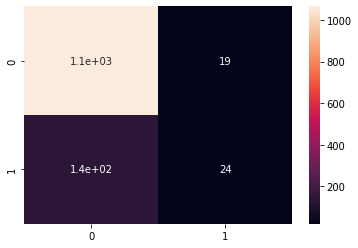

In [29]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

## BUILD A RANDOM FOREST CLASSIFIER

TRAIN AND EVALUATE A RANDOM FOREST CLASSIFIER

In [30]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
y_predict = model_rf.predict(X_test)

In [32]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1085
           1       0.91      0.75      0.82       165

    accuracy                           0.96      1250
   macro avg       0.94      0.87      0.90      1250
weighted avg       0.96      0.96      0.96      1250



## BUILD A KNN MODEL (K Nearest Neighbours)

In [34]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [35]:
y_predict  = model_knn.predict(X_test)

In [36]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1085
           1       0.65      0.27      0.38       165

    accuracy                           0.88      1250
   macro avg       0.77      0.62      0.66      1250
weighted avg       0.86      0.88      0.86      1250

